In [1]:
import os, csv, math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
results_path_256 = './3500_results/256GB/graphs/results.csv'
results_path_8 = './3500_results/8GB/graphs/results.csv'
results_path_4 = './3500_results/4GB/graphs/results.csv'

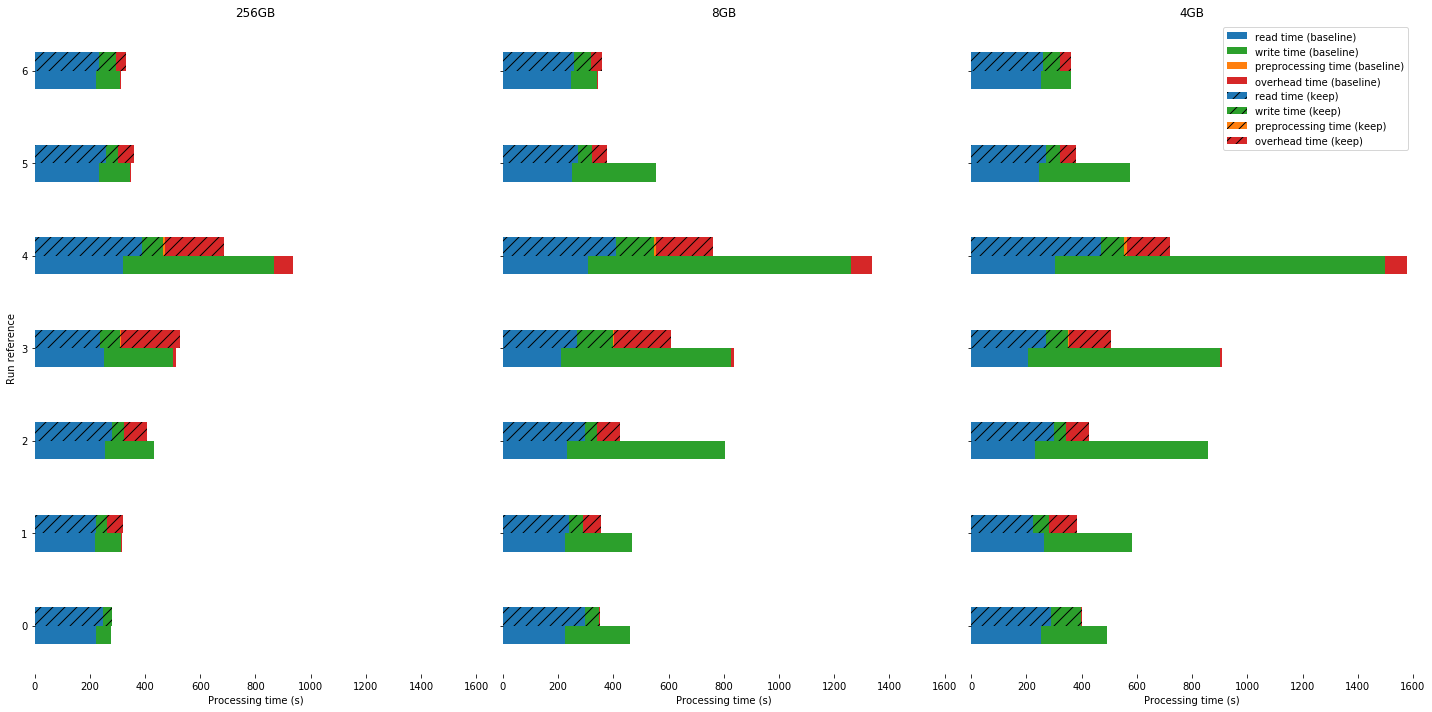

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20, 10), sharey=True)

def compute_graph(results_path, ax, title, legend=False, first=False):
    df = pd.read_csv(results_path)
    df_seeks = pd.read_csv(results_path)

    # preprocessing
    df = df.drop(columns=['max_voxels', 'success', 'case_name', 'Unnamed: 0'])
    df['nb_seeks'] = df['outfile_openings'] + df['outfile_seeks'] + df['infile_openings'] + df['infile_seeks']
    df = df.drop(columns=['outfile_openings', 'outfile_seeks', 'infile_openings', 'infile_seeks'])
    df['overhead'] = df['process_time'] - df['preprocess_time'] - df['read_time'] - df['write_time']

    references = df["run_ref"].unique()
    models = df["model"].unique()

    # df splits
    df = df.sort_values(["model", "run_ref"])

    df_keep = df.loc[df["model"]=="keep"]
    keep_means = df_keep.groupby('run_ref').mean()
    keep_stds = df_keep.groupby('run_ref').std()

    df_baseline = df.loc[df["model"]=="baseline"]
    baseline_means = df_baseline.groupby('run_ref').mean()
    baseline_stds = df_baseline.groupby('run_ref').std()
    
    x = np.arange(len(references))  # the label locations
    baseline_prepross_bottom = baseline_means["write_time"] + baseline_means['read_time']
    baseline_overhead_bottom = baseline_prepross_bottom + baseline_means['preprocess_time']
    keep_prepross_bottom = keep_means["write_time"] + keep_means['read_time']
    keep_overhead_bottom = keep_prepross_bottom + keep_means['preprocess_time']
    
    width = 0.20  # the width of the bars
    width_step = [width /2, width /2]
    
    _ = ax.barh(x - width_step[0], baseline_means["read_time"], width, yerr=baseline_stds['read_time'], label='read time (baseline)', color=['tab:blue'])
    _ = ax.barh(x - width_step[0], baseline_means["write_time"], width, left=baseline_means["read_time"], yerr=baseline_stds['write_time'], label='write time (baseline)', color=['tab:green'])
    _ = ax.barh(x - width_step[0], baseline_means["preprocess_time"], width, left=baseline_prepross_bottom, yerr=baseline_stds['preprocess_time'], label='preprocessing time (baseline)', color=['tab:orange'])
    _ = ax.barh(x - width_step[0], baseline_means["overhead"], width, left=baseline_overhead_bottom, yerr=baseline_stds['overhead'], label='overhead time (baseline)', color=['tab:red'])

    _ = ax.barh(x + width_step[1], keep_means["read_time"], width, yerr=keep_stds['read_time'], label='read time (keep)', color=['tab:blue'], hatch='//')
    _ = ax.barh(x + width_step[1], keep_means["write_time"], width, left=keep_means['read_time'], yerr=keep_stds['write_time'], label='write time (keep)', color=['tab:green'], hatch='//')
    _ = ax.barh(x + width_step[1], keep_means["preprocess_time"], width, left=keep_prepross_bottom, yerr=keep_stds['preprocess_time'], label='preprocessing time (keep)', color=['tab:orange'], hatch='//')
    _ = ax.barh(x + width_step[1], keep_means["overhead"], width, left=keep_overhead_bottom, yerr=keep_stds['overhead'], label='overhead time (keep)', color=['tab:red'], hatch='//')

    ax.set_xlabel('Processing time (s)')
    if first:
        ax.set_ylabel('Run reference')
    ax.set_title(title)
    # ax.set_xticks(x)
    # ax.set_xticklabels(sorted(references))
    ax.set_xlim(right=1600) #-> for 3500 img results
    
    if legend:
        # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.legend(loc='upper right')
    
    return 

compute_graph(results_path_256, ax1, '256GB', legend=False, first=True)
compute_graph(results_path_8, ax2, '8GB', legend=False)
compute_graph(results_path_4, ax3, '4GB', legend=True)
for spine in ax1.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)
for spine in ax3.spines.values():
    spine.set_visible(False)
fig.tight_layout()